# Boston Housing Regression

The goal of this notebook is to perform regression on the dataset to develop a model that can predict the price of a home, given the features in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)
boston_df = boston.data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create Pandas DataFrame

Create DataFrame, check head of the dataframe, check for missing values, and get descriptive statistics

In [3]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
df['MEDV'] = boston.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis

In [8]:
#sns.pairplot(df)

### Checking for relationships between features

In this case, a seaborn pairplot is too much to look at, having 13 features. Since the target feature to predict is the home price, MEDV, calculating the correlation coefficients for the features with MEDV may provide more information.

In [9]:
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

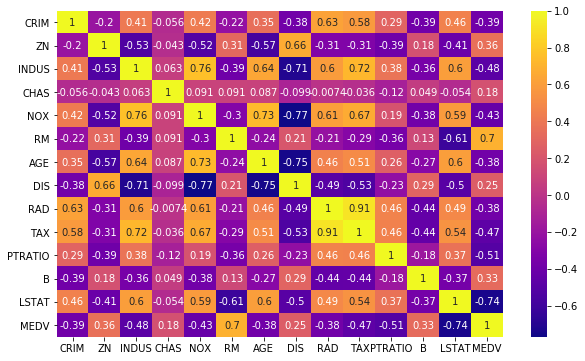

In [10]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),cmap='plasma',annot=True)

Features with a high correlation to MEDV should be selected, like RM and LSTAT.

Features with multicollinearity (defined here as correlation > 0.75): 
* RAD, TAX
* DIS, AGE
* DIS, NOX

When building the regression model, will drop RAD and DIS. Out of features with multicollinearity RAD and DIS have lowest correlation with the target, MEDV.

### Distribution of MEDV

The distribution of MEDV (house prices) has a mean of around 22, but 75% of the prices are below 25. The remaining MEDV values are higher, skewing the data (right-skewed). Will need to check for under/over predicting once model is trained.

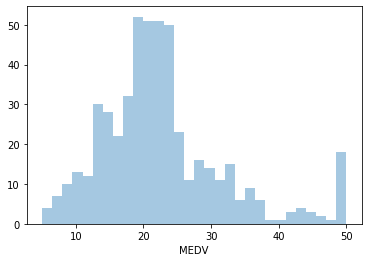

In [11]:
sns.distplot(df['MEDV'],kde=False,bins=30)

## Building the linear regression model

In [12]:
from sklearn.model_selection import train_test_split

X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(lm.intercept_)
print(lm.coef_)

15.256639168254807
[-6.15793741e-02 -1.00600618e-02  7.24913087e-02  3.88166008e+00
 -6.27392574e+00  4.41920479e+00  1.16505301e-02  2.12843965e-03
 -8.92200500e-01  1.12642918e-02 -5.56759285e-01]


### Reviewing the coefficients

Feature descriptions:
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's
        


In [15]:
df_coef = pd.DataFrame(lm.coef_,X.columns,columns=['Lin Reg Coef'])
df_coef['Corr with MEDV'] = df.corr()['MEDV']
df_coef

,Lin Reg Coef,Corr with MEDV
CRIM,-0.061579,-0.388305
ZN,-0.010060,0.360445
INDUS,0.072491,-0.483725
CHAS,3.881660,0.175260
NOX,-6.273926,-0.427321
RM,4.419205,0.695360
AGE,0.011651,-0.376955
TAX,0.002128,-0.468536
PTRATIO,-0.892201,-0.507787
B,0.011264,0.333461


### Generating and reviewing predictions

In [16]:
predictions = lm.predict(X_test)

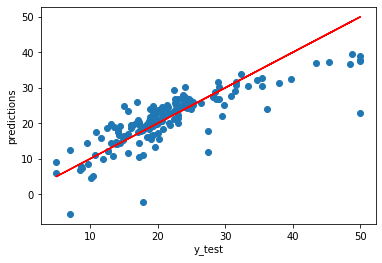

In [17]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

# plot perfect prediction line
plt.plot(y_test,y_test,'r')

The linear regression fit is not accurate for higher values of y_test, and suggests the model is underfitting for higher MEDV.

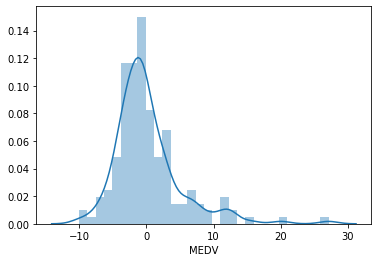

In [18]:
sns.distplot((y_test-predictions),bins=30)

The distribution of the residuals is close to normal.

### Evaluating the performance of the linear regression model

In [19]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
print(f'MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}')
print(f'R^2: {metrics.explained_variance_score(y_test,predictions)}')

MAE: 3.3929256955656877
MSE: 25.270536937786165
RMSE: 5.02698089689887
R^2: 0.6666654182575011


### Investigating predictions for single points

In this section, two data points are taken from the dataframe. Each point is a group of features to feed into the model. The first point contains the features corresponding to the maximum value for MEDV, the second point for the average value of MEDV.

In [20]:
df.idxmax(axis=0)

CRIM       380
ZN          57
INDUS      488
CHAS       142
NOX        142
RM         364
AGE          8
DIS        353
RAD        356
TAX        488
PTRATIO    354
B            0
LSTAT      374
MEDV       161
dtype: int64

In [21]:
single_house = df.drop(['MEDV','DIS','RAD'],axis=1).iloc[161]
single_house

CRIM         1.46336
ZN           0.00000
INDUS       19.58000
CHAS         0.00000
NOX          0.60500
RM           7.48900
AGE         90.80000
TAX        403.00000
PTRATIO     14.70000
B          374.43000
LSTAT        1.73000
Name: 161, dtype: float64

In [22]:
single_house = np.reshape(single_house.values,(1,11))
single_house

array([[  1.46336,   0.     ,  19.58   ,   0.     ,   0.605  ,   7.489  ,
         90.8    , 403.     ,  14.7    , 374.43   ,   1.73   ]])

In [23]:
predict_single = lm.predict(single_house)

In [24]:
predict_single

array([37.940383])

In [25]:
df.iloc[161]['MEDV']

50.0

A new prediction is created using data from the row in the dataframe corresponding to the highest MEDV, in row 374. If the model was predicting accurately, the predicted value would be close to the actual MEDV from row 374, equal to 50.0. However, the predicted value is 37.94, suggesting that the model is underfitting higher prices.

In [26]:
average_house = df.drop(['MEDV','DIS','RAD'],axis=1).mean().values
average_house = np.reshape(average_house,(1,11))

In [27]:
predict_single_average = lm.predict(average_house)

In [28]:
predict_single_average

array([22.46336221])

In [29]:
df['MEDV'].mean()

22.532806324110698

Predicted value for an average house is very close to the actual value.

## Checking for nonlinearity between features and target

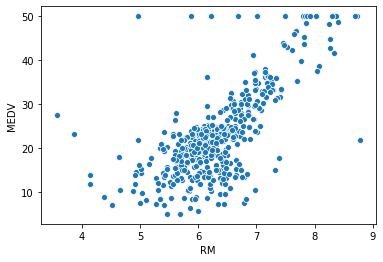

In [30]:
sns.scatterplot(x='RM',y='MEDV',data=df)

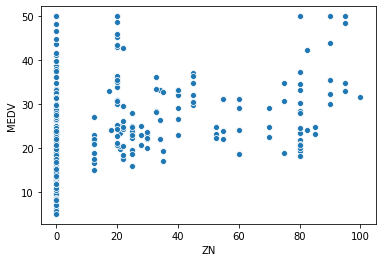

In [31]:
sns.scatterplot(x='ZN',y='MEDV',data=df)

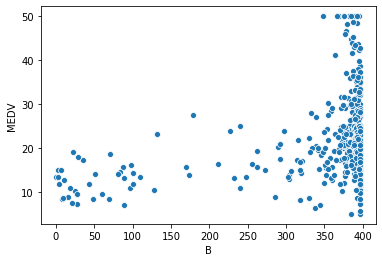

In [32]:
sns.scatterplot(x='B',y='MEDV',data=df)

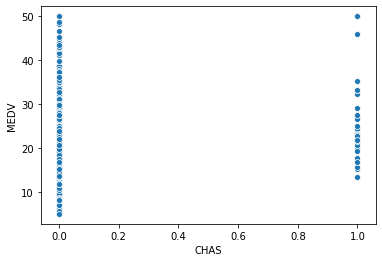

In [33]:
sns.scatterplot(x='CHAS',y='MEDV',data=df)

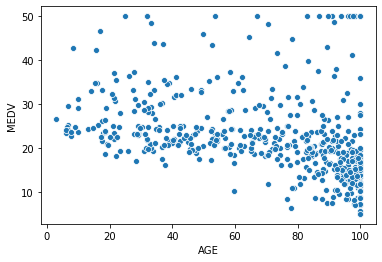

In [34]:
sns.scatterplot(x='AGE',y='MEDV',data=df)

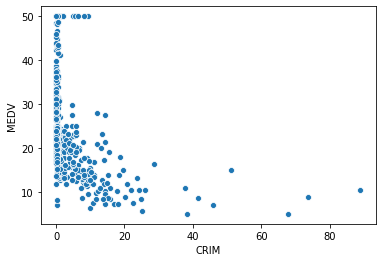

In [35]:
sns.scatterplot(x='CRIM',y='MEDV',data=df)

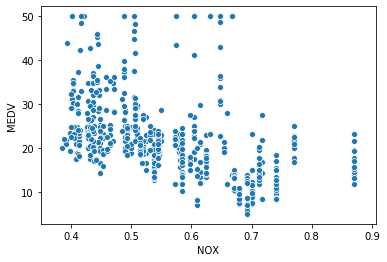

In [36]:
sns.scatterplot(x='NOX',y='MEDV',data=df)

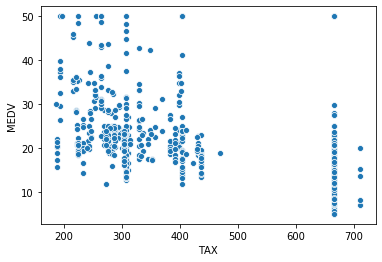

In [37]:
sns.scatterplot(x='TAX',y='MEDV',data=df)

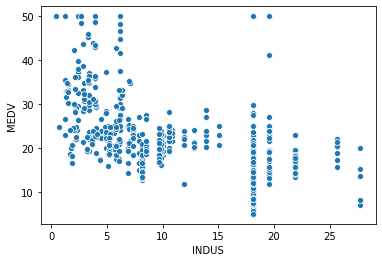

In [38]:
sns.scatterplot(x='INDUS',y='MEDV',data=df)

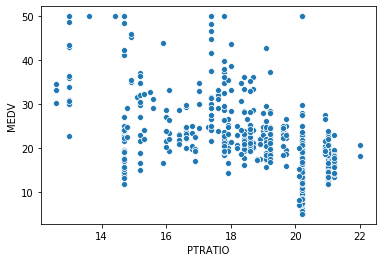

In [39]:
sns.scatterplot(x='PTRATIO',y='MEDV',data=df)

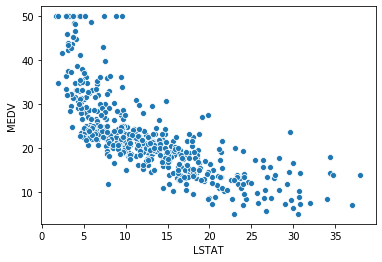

In [40]:
sns.scatterplot(x='LSTAT',y='MEDV',data=df)

### Creating polynomial regression, degree 2

Only the features that have a nonlinear relationship with MEDV will be used: RM and LSTAT

In [41]:
feature_list = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','TAX','PTRATIO','B','LSTAT']
X = df[['RM','LSTAT']]
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)

X_test_poly = poly_features.fit_transform(X_test)

poly_predictions = poly_model.predict(X_test_poly)

MEDV = intercept + (B1 * RM) + (B2 * LSTAT) + (B3 * RM^2) + (B4 * LSTAT^2) + (B5 * RM * LSTAT)

In [43]:
poly_features.get_feature_names(X_train.columns)

['1', 'RM', 'LSTAT', 'RM^2', 'RM LSTAT', 'LSTAT^2']

In [44]:
poly_model.intercept_

57.725004223871956

In [49]:
df_poly_coef = pd.DataFrame(poly_model.coef_,poly_features.get_feature_names(X_train.columns),columns=['Poly Reg Coef Value'])
df_poly_coef['Coef Name'] = [0,'B1','B2','B3','B4','B5']
df_poly_coef = df_poly_coef[['Coef Name','Poly Reg Coef Value']]
df_poly_coef

,Coef Name,Poly Reg Coef Value
1,0,0.000000
RM,B1,-12.894727
LSTAT,B2,-0.089013
RM^2,B3,1.465519
RM LSTAT,B4,-0.193534
LSTAT^2,B5,0.015401


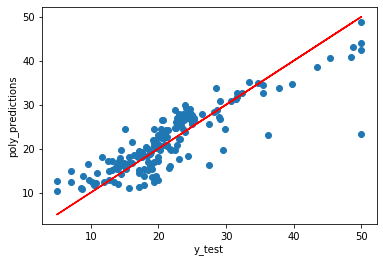

In [46]:
plt.scatter(y_test,poly_predictions)
plt.xlabel('y_test')
plt.ylabel('poly_predictions')

# plot perfect prediction line
plt.plot(y_test,y_test,'r')

In [47]:
MAE = metrics.mean_absolute_error(y_test,poly_predictions)
MSE = metrics.mean_squared_error(y_test,poly_predictions)
RMSE = np.sqrt(MSE)
print(f'MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}')
print(f'R^2: {metrics.explained_variance_score(y_test,poly_predictions)}')

MAE: 3.1222583433790065
MSE: 18.491793743333307
RMSE: 4.3002085697479036
R^2: 0.7565687254843353


## Conclusion

A linear regression model has been fit to the Boston Housing Data in order to predict the MEDV with an explained variance score (R^2) of 0.67. 

Further investigation into the features has revealed that the two most correlated features with MEDV are RM and LSTAT, and they look to have nonlinear relationships with MEDV. Experimenting with a 2nd degree polynomial regression using only RM and LSTAT has improved the R^2 to 0.76.